In [17]:
import numpy as np
import pandas as pd
from main import *
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.data.csv')

## How many people of each race are represented in this dataset?

In [3]:
race_count = pd.Series(df['race'].value_counts())
print("Number of each race:\n", race_count) 

Number of each race:
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


##### Graph showing different race counts

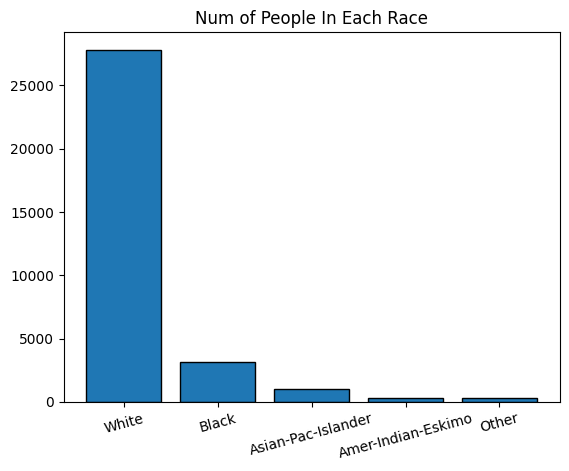

In [4]:
plt_race_count()

## What is the average age of men?

In [5]:
average_age_men = round(df[df['sex'] == 'Male']['age'].mean(), 1)
print("Average age of men:", average_age_men)

Average age of men: 39.4


##### Graph showing avg age of men

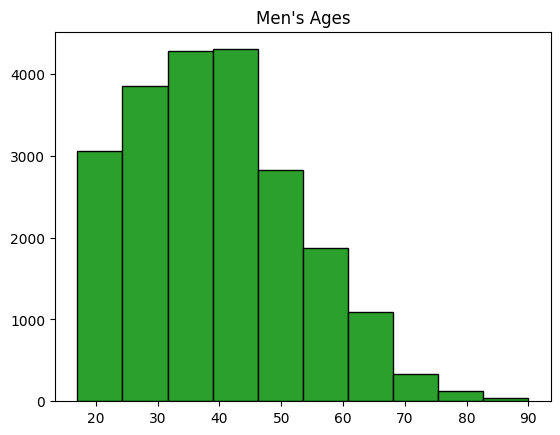

In [6]:
plt_men_age()

## Percentage of people who have a bachelor's

In [7]:
totaledu = (df['education']).count()

bachedu = (df['education'] == "Bachelors").sum()

#percentage of bachedu to totaledu
percentage_bachelors = (bachedu/totaledu)*100
print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")



Percentage with Bachelors degrees: 16.44605509658794%


In [8]:
(df['education']=="Bachelors").sum()

5355

##### Graph showing Bachelors VS No Bachelors

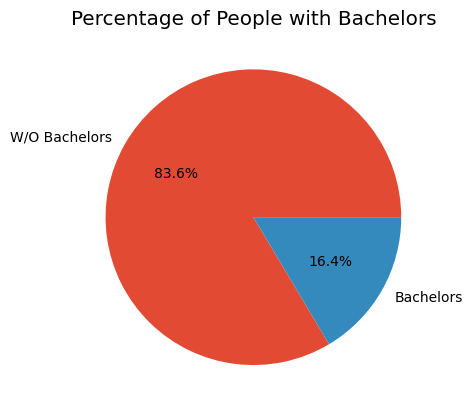

In [18]:
plt_bach_pie()

## What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [19]:
mask1 = (df['education'] == "Bachelors") | (df['education'] == "Masters") | (df['education'] == "Doctorate")
mask2 = df['salary'] == ">50K"
mymask = mask1 & mask2

higher_education_rich = mymask.sum() / mask1.sum() * 100
higher_education_rich = round(higher_education_rich,1)
print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")


Percentage with higher education that earn >50K: 46.5%


## What percentage of people without advanced education make more than 50K?

In [20]:
mask3 = (df['education'] != "Bachelors") & (df['education'] != "Masters") & (df['education'] != "Doctorate")

lower_education_rich = len(df[mask3 & mask2]) / len(df[mask3]) * 100
lower_education_rich = round(lower_education_rich,1)
print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")


Percentage without higher education that earn >50K: 17.4%


##### Graph showing >50k salaries for Normal Education VS Advanced Education

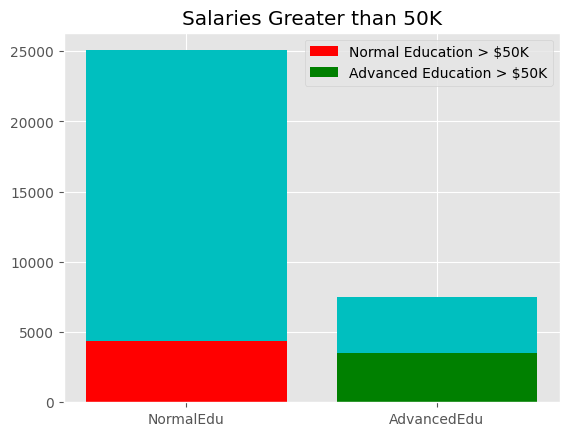

In [21]:
plt_salaries_50k()

#### What is the minimum number of hours a person works per week?


In [22]:
min_work_hours = df['hours-per-week'].min()
print(f"Min work time: {min_work_hours} hours/week")


Min work time: 1 hours/week


#### What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [23]:
rich_percentage = len(df[(df['hours-per-week'] == 1) & (df['salary'] == ">50K")]) / len(df[df['hours-per-week'] == 1]) * 100
print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")


Percentage of rich among those who work fewest hours: 10.0%


#### What country has the highest percentage of people that earn >50K and what is that percentage?

In [24]:
highest_earning_country = (df['native-country'][mask2].value_counts() / df['native-country' ].value_counts()).idxmax()

highest_earning_country_percentage = round((df['native-country'][mask2].value_counts() / df['native-country'].value_counts()).max() * 100, 1)
print("Country with highest percentage of rich:", highest_earning_country)
print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")


Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%


#### Identify the most popular occupation for those who earn >50K in India.

In [25]:
top_IN_occupation = df[((df['native-country'] == "India") & mask2)]['occupation'].value_counts().idxmax()
print("Top occupations in India:", top_IN_occupation)


Top occupations in India: Prof-specialty
